In [21]:
'''# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
import matplotlib.animation as animation
from matplotlib import colors
'''

'# Import libraries\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom scipy.ndimage import convolve\nimport matplotlib.animation as animation\nfrom matplotlib import colors\n'

## Explanation

Below is the code for the initial set up proposed in the document we were given on Monday. 
We should look to define the code below in two seperate functions for clarity that can then be used to judge changes over time

In terms of improving our model here are some initial thoughts:
1) Larger range of house values with their probabilities of occurence and the values themselves decided by referenced research for a specific city/town
2) Consider the most important neighbourhood properties and either incorporate them into our equations or define new equations
3) change size of neighbourhood but also weighting of neighbourhood (the immediate neighbours should have a more significant impact than neighbours further away)
4) Perhaps we could add some changes in income over time to match the development of salaries?
5) Find a way to model the fact that people leave and enter new cities all the time. Have a proportion of people leave the city and enter the city at each timestep.

House Prices (V):
 [[ 500  100  500  100  100  100  500  100  100  100]
 [1000  100  100  100 1000 1000  100  500  100  100]
 [ 500  100  500  500  100  100  100 1000  100 1000]
 [ 500 1000  100  500  500  100  100  100  100 1000]
 [ 500  100 1000  100  100  100  500  100  500  100]
 [1000 1000 1000  100  500 1000  100 1000  500  100]
 [1000 1000  100  500 1000  100  100  500  100  100]
 [ 100 1000 1000  100  100 1000  100  100  100 1000]
 [1000  100  500  500 1000  100  500  100 1000  100]
 [ 500 1000  500  500 1000  100  100  500  100  100]]

Income Levels (A):
 [[1.  0.5 0.1 0.1 0.1 1.  1.  0.1 0.1 0.5]
 [0.1 0.1 0.1 0.5 0.5 1.  0.5 0.1 1.  0.1]
 [0.5 1.  0.1 0.1 0.1 0.5 0.1 0.5 0.1 0.1]
 [0.1 0.5 1.  0.5 0.1 0.5 0.5 0.1 1.  1. ]
 [0.1 0.5 0.1 0.1 0.5 0.1 0.1 1.  0.1 0.5]
 [0.5 0.1 1.  0.5 0.1 0.1 0.1 0.5 0.1 1. ]
 [0.5 0.1 0.1 0.1 0.1 0.1 0.5 0.1 0.5 1. ]
 [1.  0.1 1.  0.5 1.  0.1 1.  0.5 0.1 0.5]
 [0.1 0.5 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.5 0.5 0.5 1.  0.5 0.5 0.5 0.1 0.1 0.5]

MovieWriter ffmpeg unavailable; using Pillow instead.


Finished and saved animation.


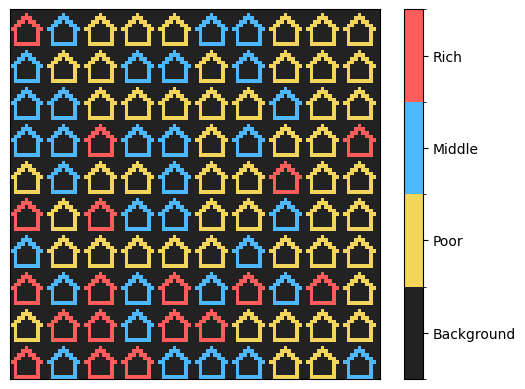

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
import matplotlib.animation as animation
from matplotlib import colors


n = 10
m = 10
house_range = 5
num_steps = 100
income_values = [0.1,0.5,1.0]
income_probabilities = [0.5, 0.3, 0.2]

def house_update(neighbourhood_size,A, V):
    # Update house values

    old_V = V.copy()
    z = 1 # coefficient value (change as necessary) # z is lambda...

    # Define Neighbourhood area size
    neighbourhood = np.ones((neighbourhood_size,neighbourhood_size))

    # Computes sum of neighbourhood house values and number of neighbours using convolution
    # constant mode with cval = 0 treats anything outside of edges of matrix as zero
    # Search up convolve function to understand this part
    neighbourhood_sum = convolve(old_V, neighbourhood, mode='constant', cval = 0)
    neighbourhood_count = convolve(np.ones((n,m)), neighbourhood, mode='constant', cval = 0)

    # Use equation given in worksheet to calculate new values of houses
    V = np.round(A + z * (neighbourhood_sum / neighbourhood_count))

    print("Sum of Neighbourhood House Values:\n", neighbourhood_sum) 
    print("Number of Neighbours:\n", neighbourhood_count)
    print("Updated House Prices:\n", V)
    return A, V

def move(n,m, A, V):
    # Propose a move

    # Flattened choice using numpy
    total_grid_cells = n * m

    # Randomly selects a number between 0 and the total number of grid cells
    flat_indices = np.random.choice(total_grid_cells, size=2, replace=False)  # replace=False to ensure distinct choices
    print(flat_indices)

    # Translate value back into distinct gridspace 
    # divmod does i1 = flat_indices // m, j1 = flat_indices % m
    i1, j1 = divmod(flat_indices[0], m)
    i2, j2 = divmod(flat_indices[1], m)

    print("Random position 1:", (i1,j1))
    print("Random position 2:", (i2,j2))

    # Calculate value of Delta function given by the worksheet
    d = (A[i1,j1] - V[i1,j1])**2 + (A[i2,j2] - V[i2,j2])**2 - (A[i1,j1] - V[i2,j2])**2 - (A[i2,j2] - V[i1,j1])**2 

    # Swap inhabitants if delta value is positive
    if d > 0:
        A[i1,j1], A[i2,j2] = A[i2,j2], A[i1,j1]

    
    print("Delta Value: ", d)
    print('Updated income',A)
    print('Updated values',V)
    return A, V


def createlat_(n,m, income_values, income_probabilities):
    # Create matrices to keep track of house prices and corresponding house owners

    # Define lattice size

    # Create lattice of house prices
    house_values = [100, 500, 1000] # Adjust accordingly
    house_probabilities = [0.5, 0.3, 0.2] # Adjust accordingly
    V = np.random.choice(house_values, size = (n,m), p = house_probabilities)


    # Create lattice of house owners
    # Poor = 0.1
    # Middle = 0.5
    # Rich = 1
    A = np.random.choice(income_values, size = (n,m), p = income_probabilities)

    print("House Prices (V):\n", V)
    print("\nIncome Levels (A):\n", A)
    return A, V

def one_step(A, V, neighbourhood_size, n, m):
    update_incomes, update_prices  = house_update(neighbourhood_size,A,V)
    final_incomes, final_values = move(n,m,update_incomes, update_prices)
    return final_incomes, final_values


def p_steps(n,m,neighbourhood_size, num_steps, income_values, income_probabilities):
    income,value = createlat_(n,m, income_values, income_probabilities)
    House_history = []
    House_history.append(income.copy())
    for i in range(0,num_steps):
        income, value = one_step(income,value,neighbourhood_size,n,m)
        House_history.append(income.copy())
    print('Final incomes:', income, 'Final values:', value )
    
    return House_history

House_history = p_steps(n,m, house_range,num_steps, income_values, income_probabilities)

# Define house for display
'''
house = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
                         [0, 0, 0, 1, 1, 1, 0, 0, 0],
                         [0, 0, 1, 1, 0, 1, 1, 0, 0],
                         [0, 1, 1, 0, 0, 0, 1, 1, 0],
                         [1, 1, 0, 0, 0, 0, 0, 1, 1],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 1, 1, 1, 1, 1, 1, 1, 0]])
house_size = house.shape[0]
'''
house = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                         [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                         [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
                         [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
                         [1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                         [0, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

house_size = house.shape[0]
initial_lattice = House_history[0]


def get_display_A(lattice):
    display_income = np.zeros((house.shape[0]*lattice.shape[0], house.shape[1]*lattice.shape[1]))
    for row in range(0, n):
        for col in range(0, m):
            display_income[row*house_size:(row+1)*house_size, col*house_size:(col+1)*house_size] = lattice[row, col] * house

    return display_income

## Custom colour map with legend and no axis numbers
cmap = colors.ListedColormap(['#222222', "#f3d55c", '#4db8ff', '#ff5c5c'])  # change to whatever
bounds=np.concatenate(([0,0.02], np.array(income_values)+0.01), axis=0)
norm = colors.BoundaryNorm(bounds, cmap.N)


initial_image = get_display_A(initial_lattice)
## Create plot
fig = plt.figure()
im=plt.imshow(initial_image, cmap=cmap, norm=norm)

legend_ticks = [(bounds[i+1]+bounds[i])/2 for i in range(0,len(bounds)-1)]
cbar = plt.colorbar(im, cmap=cmap, norm=norm, boundaries=bounds, ticks=legend_ticks)
cbar.ax.set_yticklabels(['Background', 'Poor', 'Middle', 'Rich'])
plt.xticks([])
plt.yticks([])

def init():
    display_A = get_display_A(initial_lattice)
    im.set_data(display_A)
    return [im]

def animate(i):
    global House_history
    image = House_history[i]
    im.set_array(get_display_A(image))
    return [im]

print(len(House_history))

nSeconds = num_steps/8
fps = 8
anim = animation.FuncAnimation(
                               fig, 
                               animate, 
                               init_func=init,
                               frames = len(House_history),
                               interval = 1000 / fps, # in ms
                               blit = True,
                               repeat=False
                               )

anim.save('housing_sim.gif', fps=fps)

print("Finished and saved animation.")



Gap